# 데이터
---

## 1. 데이터 불러오기

In [91]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

In [92]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train.shape, y_train.shape, x_test.shape, x_test.shape 

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 32, 32, 3))


## 2. 데이터 시각화 (EDA)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


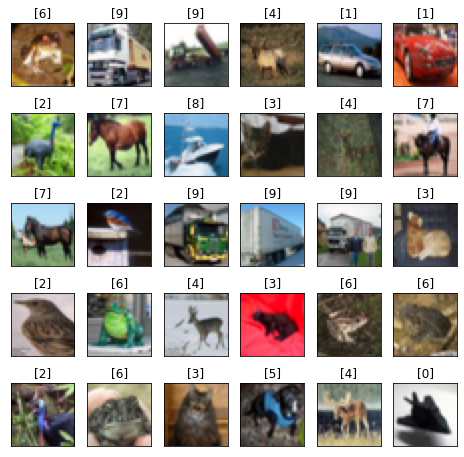

In [93]:
plt.figure(figsize=(8, 8))
for i in range(30):
  plt.subplot(5, 6, i + 1)
  img = x_train[i]
  label = y_train[i]
  plt.imshow(img, cmap= 'gray')
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
plt.show()

* 이미지 확인

In [94]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


* 실제 데이터 확인

* 데이터 시각화

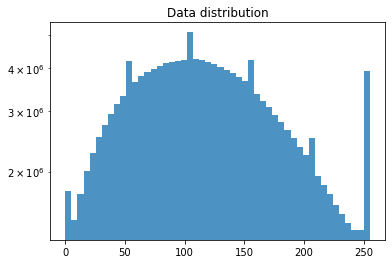

In [95]:
plt.title('Data distribution')
plt.hist(np.reshape(x_train, (50000*32*32*3)),log=True, bins=50, alpha=0.8)
# plt.hist(np.reshape(x_train, (1, -1)))
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [96]:
def minmax(x):
  x_min = np.min(x)
  x_max = np.max(x)
  # print(x_min, x_max)
  result = (x - x_min) / (x_max - x_min)
  return result

In [97]:
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)

x_train_minmax.shape, x_test_minmax.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

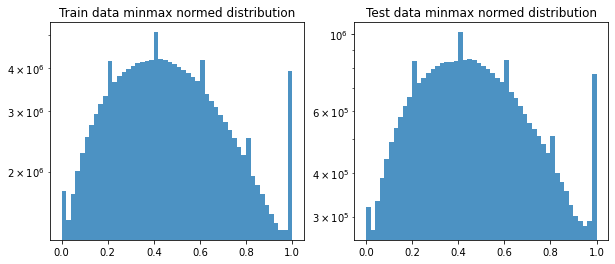

In [98]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Train data minmax normed distribution')
plt.hist(np.reshape(x_train_minmax, (50000*32*32*3)),log=True, bins=50, alpha=0.8)

plt.subplot(1, 2, 2)
plt.title('Test data minmax normed distribution')
plt.hist(np.reshape(x_test_minmax, (10000*32*32*3)),log=True, bins=50, alpha=0.8)

plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [99]:
def z_score(x):
  x_mean = np.mean(x)
  x_std = np.std(x)
  result = (x - x_mean) / x_std
  return result

In [100]:
x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)

x_train_z_score.shape, x_test_z_score.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

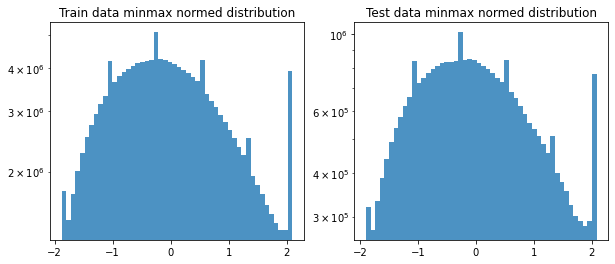

In [101]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Train data minmax normed distribution')
plt.hist(np.reshape(x_train_z_score, (50000*32*32*3)),log=True, bins=50, alpha=0.8)

plt.subplot(1, 2, 2)
plt.title('Test data minmax normed distribution')
plt.hist(np.reshape(x_test_z_score, (10000*32*32*3)),log=True, bins=50, alpha=0.8)

plt.show()

### **one-hot coding**

In [102]:
from tensorflow.keras.utils import to_categorical

In [103]:
y_train_onehot = to_categorical(y_train, num_classes =10)
y_test_onehot = to_categorical(y_test, num_classes =10)

y_train_onehot.shape, y_test_onehot.shape

((50000, 10), (10000, 10))

In [104]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# 모델
---

In [105]:
from tensorflow.keras import models, layers, optimizers

In [106]:
sr = models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape=[32, 32, 3]))
sr.add(layers.Dense(10, activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## 1. 모델구현
---

### **Softmax regression**

### **DNN**

In [107]:
DNN = models.Sequential(name='DNN')
#Input layer
DNN.add(layers.Flatten(input_shape=[32, 32, 3]))
#hidden layer
DNN.add(layers.Dense(100, activation='relu'))
DNN.add(layers.Dense(100, activation='relu'))
#output layer
DNN.add(layers.Dense(10, activation='softmax'))
DNN.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [108]:
CNN = models.Sequential(name='CNN')
# x data : (28, 28) -> 2차원
# dense : (764) -> 1차원
# convolution : (28, 28, 1) -> 3차원

#Input layer
CNN.add(layers.Reshape([32, 32, 3], input_shape=[32, 32, 3]))
# CNN.add(layers.Flatten(input_shape = [32, 32, 3]))
#hidden layer
CNN.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))
CNN.add(layers.MaxPool2D(pool_size = 3))
CNN.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))
CNN.add(layers.MaxPool2D(pool_size = 3))

#output layer
CNN.add(layers.Flatten())
CNN.add(layers.Dense(10, activation='softmax'))
CNN.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 10)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 5, 10)          2510      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110     

## 2. 학습
---

### **Softmax Regression**

In [109]:
sr.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])
sr.fit(x_train_minmax, y_train_onehot, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 3ms/step - loss: 1.9475 - acc: 0.3043
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8404 - acc: 0.3543
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8150 - acc: 0.3650
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7946 - acc: 0.3737
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7831 - acc: 0.3779
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7728 - acc: 0.3838
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7674 - acc: 0.3821
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7582 - acc: 0.3895
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7522 - acc: 0.3927
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7467 - acc: 0.3933
Epoch 11/20
1563/1563 [======

### **DNN**

In [110]:
DNN.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])
DNN.fit(x_train_minmax, y_train_onehot, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9164 - acc: 0.3105
Epoch 2/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.7298 - acc: 0.3856
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6466 - acc: 0.4165
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5964 - acc: 0.4329
Epoch 5/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5514 - acc: 0.4513
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5182 - acc: 0.4627
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4865 - acc: 0.4740
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4621 - acc: 0.4831
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4402 - acc: 0.4893
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4179 - acc: 0.4969
Epoch 11/20
1563/1563 [======

### CNN

In [111]:
CNN.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])
CNN.fit(x_train_minmax, y_train_onehot, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 34s 5ms/step - loss: 2.2529 - acc: 0.1649
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0787 - acc: 0.2463
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9293 - acc: 0.2835
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8375 - acc: 0.3172
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7666 - acc: 0.3460
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6964 - acc: 0.3763
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6457 - acc: 0.3998
Epoch 8/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6103 - acc: 0.4169
Epoch 9/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5839 - acc: 0.4256
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5658 - acc: 0.4327
Epoch 11/20
1563/1563 [=====

## 3. 성능평가
---

### Softmax Regression

In [112]:
# evaluate : 성능 평가  test를 하고싶을때 (labels이 있는경우)
# predict : 값 예측을 하고싶을때 (labels이 없는경우)
sr_score = sr.evaluate(x_test_minmax, y_test_onehot, verbose = 1)

print("accuracy :", sr_score[1], "loss :", sr_score[0])

313/313 [==============================] - 1s 3ms/step - loss: 1.8597 - acc: 0.3399
accuracy : 0.3398999869823456 loss : 1.8596729040145874


### DNN

In [113]:
DNN_score = DNN.evaluate(x_test_minmax, y_test_onehot, verbose = 1)

print("accuracy :", DNN_score[1], "loss :", DNN_score[0])

313/313 [==============================] - 1s 3ms/step - loss: 1.4524 - acc: 0.4859
accuracy : 0.48590001463890076 loss : 1.4524061679840088


### CNN

In [114]:
CNN_score = CNN.evaluate(x_test_minmax, y_test_onehot, verbose = 1)

print("accuracy :", CNN_score[1], "loss :", CNN_score[0])

313/313 [==============================] - 1s 4ms/step - loss: 1.4791 - acc: 0.4728
accuracy : 0.47279998660087585 loss : 1.4790728092193604
